In [1]:
# Compatibility patch: fix NumPy>=2.0 / old MNE fromstring usage
import numpy as np
import inspect

# Only patch if necessary
if hasattr(np, "fromstring"):
    _orig_fromstring = np.fromstring
    def _safe_fromstring(string, dtype=float, sep=""):
        try:
            # try original behaviour (works for NumPy < 2.0 or text-mode)
            return _orig_fromstring(string, dtype=dtype, sep=sep)
        except ValueError:
            # fallback for binary-mode usage in older code (e.g. MNE's GDF reader)
            # ensure we have bytes
            if isinstance(string, str):
                string = string.encode()
            # if it is already bytes-like or memoryview, np.frombuffer works
            return np.frombuffer(string, dtype=dtype)
    np.fromstring = _safe_fromstring

# Optional: show versions for debugging
import sys
print("numpy.__version__ =", np.__version__)
try:
    import mne
    print("mne.__version__ =", mne.__version__)
except Exception as e:
    print("mne import not executed yet (that's OK).")


numpy.__version__ = 2.3.3
mne.__version__ = 1.10.1


In [2]:
import mne
raw = mne.io.read_raw_gdf("../BCICIV_2a_gdf/A01T.gdf", preload=False, verbose=False)
print("Loaded OK. n_channels:", len(raw.ch_names), "sfreq:", raw.info['sfreq'])


Loaded OK. n_channels: 25 sfreq: 250.0


c:\Users\Sujal Bhatu\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Device: cpu

======================== A01 ========================


c:\Users\Sujal Bhatu\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


[loader] A01T.gdf annotation counts sample: [('32766', 9), ('276', 1), ('277', 1), ('1072', 1), ('768', 288), ('772', 72), ('771', 72), ('770', 72), ('769', 72), ('1023', 15)]
[loader] found canonical MI cues (769-772).
[loader] mapping desc->label: {'769': 0, '770': 1, '771': 2, '772': 3}
[loader] chosen counts: {'769': 72, '770': 72, '771': 72, '772': 72}
[loader] extracted epochs shape: (288, 25, 512), label distribution: [72 72 72 72]
[A01] train epochs shape: (288, 25, 512), classes: [72 72 72 72]


c:\Users\Sujal Bhatu\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


[A01] NOTE: evaluation file does NOT contain MI cues (we will use stratified CV on training only).
[A01] fold 1 ep 001 train_loss=1.4888 val_acc=0.2586
[A01] fold 1 ep 010 train_loss=0.5656 val_acc=0.2414
[A01] fold 1 ep 020 train_loss=0.0063 val_acc=0.3448
[A01] fold 1 ep 030 train_loss=0.0017 val_acc=0.3276
[A01] fold 1 early stopping at ep 32, best_val=0.3448 (epoch 20)
[A01] fold 1 best_val_acc = 0.3448
[A01] fold 2 ep 001 train_loss=1.4502 val_acc=0.2414
[A01] fold 2 ep 010 train_loss=0.2811 val_acc=0.3103
[A01] fold 2 early stopping at ep 17, best_val=0.3966 (epoch 5)
[A01] fold 2 best_val_acc = 0.3966
[A01] fold 3 ep 001 train_loss=1.5286 val_acc=0.2586
[A01] fold 3 ep 010 train_loss=0.0357 val_acc=0.1897
[A01] fold 3 early stopping at ep 16, best_val=0.2759 (epoch 4)
[A01] fold 3 best_val_acc = 0.2759
[A01] fold 4 ep 001 train_loss=1.5428 val_acc=0.2632
[A01] fold 4 ep 010 train_loss=0.0569 val_acc=0.2456
[A01] fold 4 early stopping at ep 19, best_val=0.3158 (epoch 7)
[A01] fol

c:\Users\Sujal Bhatu\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


[loader] A02T.gdf annotation counts sample: [('32766', 9), ('276', 1), ('277', 1), ('1072', 1), ('768', 288), ('769', 72), ('770', 72), ('771', 72), ('772', 72), ('1023', 18)]
[loader] found canonical MI cues (769-772).
[loader] mapping desc->label: {'769': 0, '770': 1, '771': 2, '772': 3}
[loader] chosen counts: {'769': 72, '770': 72, '771': 72, '772': 72}
[loader] extracted epochs shape: (288, 25, 512), label distribution: [72 72 72 72]
[A02] train epochs shape: (288, 25, 512), classes: [72 72 72 72]


c:\Users\Sujal Bhatu\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


[A02] NOTE: evaluation file does NOT contain MI cues (we will use stratified CV on training only).
[A02] fold 1 ep 001 train_loss=1.4868 val_acc=0.2414
[A02] fold 1 ep 010 train_loss=0.6964 val_acc=0.2759
[A02] fold 1 early stopping at ep 17, best_val=0.2931 (epoch 5)
[A02] fold 1 best_val_acc = 0.2931
[A02] fold 2 ep 001 train_loss=1.5230 val_acc=0.2586
[A02] fold 2 ep 010 train_loss=0.0532 val_acc=0.2241
[A02] fold 2 ep 020 train_loss=0.0026 val_acc=0.2931
[A02] fold 2 early stopping at ep 26, best_val=0.2931 (epoch 14)
[A02] fold 2 best_val_acc = 0.2931
[A02] fold 3 ep 001 train_loss=1.4906 val_acc=0.2414
[A02] fold 3 ep 010 train_loss=0.0095 val_acc=0.1034
[A02] fold 3 early stopping at ep 13, best_val=0.2414 (epoch 1)
[A02] fold 3 best_val_acc = 0.2414
[A02] fold 4 ep 001 train_loss=1.4800 val_acc=0.2456
[A02] fold 4 ep 010 train_loss=0.1007 val_acc=0.2105
[A02] fold 4 early stopping at ep 13, best_val=0.2456 (epoch 1)
[A02] fold 4 best_val_acc = 0.2456
[A02] fold 5 ep 001 train_l

c:\Users\Sujal Bhatu\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


[loader] A03T.gdf annotation counts sample: [('32766', 9), ('276', 1), ('277', 1), ('1072', 1), ('768', 288), ('769', 72), ('770', 72), ('771', 72), ('772', 72), ('1023', 18)]
[loader] found canonical MI cues (769-772).
[loader] mapping desc->label: {'769': 0, '770': 1, '771': 2, '772': 3}
[loader] chosen counts: {'769': 72, '770': 72, '771': 72, '772': 72}
[loader] extracted epochs shape: (288, 25, 512), label distribution: [72 72 72 72]
[A03] train epochs shape: (288, 25, 512), classes: [72 72 72 72]


c:\Users\Sujal Bhatu\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


[A03] NOTE: evaluation file does NOT contain MI cues (we will use stratified CV on training only).
[A03] fold 1 ep 001 train_loss=1.5131 val_acc=0.2586
[A03] fold 1 ep 010 train_loss=0.2493 val_acc=0.2069
[A03] fold 1 ep 020 train_loss=0.0025 val_acc=0.2069
[A03] fold 1 early stopping at ep 20, best_val=0.3103 (epoch 8)
[A03] fold 1 best_val_acc = 0.3103
[A03] fold 2 ep 001 train_loss=1.5229 val_acc=0.2586
[A03] fold 2 ep 010 train_loss=0.6576 val_acc=0.2241
[A03] fold 2 ep 020 train_loss=0.0041 val_acc=0.2414
[A03] fold 2 early stopping at ep 20, best_val=0.2931 (epoch 8)
[A03] fold 2 best_val_acc = 0.2931
[A03] fold 3 ep 001 train_loss=1.4874 val_acc=0.2414
[A03] fold 3 ep 010 train_loss=0.6101 val_acc=0.2241
[A03] fold 3 early stopping at ep 18, best_val=0.3276 (epoch 6)
[A03] fold 3 best_val_acc = 0.3276
[A03] fold 4 ep 001 train_loss=1.5481 val_acc=0.2632
[A03] fold 4 ep 010 train_loss=0.0108 val_acc=0.1754
[A03] fold 4 early stopping at ep 15, best_val=0.2982 (epoch 3)
[A03] fold

c:\Users\Sujal Bhatu\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


[loader] A04T.gdf annotation counts sample: [('32766', 7), ('1072', 1), ('768', 288), ('772', 72), ('769', 72), ('770', 72), ('771', 72), ('1023', 26)]
[loader] found canonical MI cues (769-772).
[loader] mapping desc->label: {'769': 0, '770': 1, '771': 2, '772': 3}
[loader] chosen counts: {'769': 72, '770': 72, '771': 72, '772': 72}
[loader] extracted epochs shape: (288, 25, 512), label distribution: [72 72 72 72]
[A04] train epochs shape: (288, 25, 512), classes: [72 72 72 72]


c:\Users\Sujal Bhatu\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


[A04] NOTE: evaluation file does NOT contain MI cues (we will use stratified CV on training only).
[A04] fold 1 ep 001 train_loss=1.4682 val_acc=0.2586
[A04] fold 1 ep 010 train_loss=0.5921 val_acc=0.1897
[A04] fold 1 early stopping at ep 18, best_val=0.2759 (epoch 6)
[A04] fold 1 best_val_acc = 0.2759
[A04] fold 2 ep 001 train_loss=1.5038 val_acc=0.2586
[A04] fold 2 ep 010 train_loss=0.4194 val_acc=0.2241
[A04] fold 2 early stopping at ep 16, best_val=0.3276 (epoch 4)
[A04] fold 2 best_val_acc = 0.3276
[A04] fold 3 ep 001 train_loss=1.5610 val_acc=0.2586
[A04] fold 3 ep 010 train_loss=0.0915 val_acc=0.2586
[A04] fold 3 early stopping at ep 16, best_val=0.2759 (epoch 4)
[A04] fold 3 best_val_acc = 0.2759
[A04] fold 4 ep 001 train_loss=1.4865 val_acc=0.2632
[A04] fold 4 ep 010 train_loss=0.0925 val_acc=0.2982
[A04] fold 4 early stopping at ep 19, best_val=0.4035 (epoch 7)
[A04] fold 4 best_val_acc = 0.4035
[A04] fold 5 ep 001 train_loss=1.4596 val_acc=0.2456
[A04] fold 5 ep 010 train_lo

c:\Users\Sujal Bhatu\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


[loader] A05T.gdf annotation counts sample: [('32766', 9), ('276', 1), ('277', 1), ('1072', 1), ('768', 288), ('1023', 26), ('769', 72), ('770', 72), ('771', 72), ('772', 72)]
[loader] found canonical MI cues (769-772).
[loader] mapping desc->label: {'769': 0, '770': 1, '771': 2, '772': 3}
[loader] chosen counts: {'769': 72, '770': 72, '771': 72, '772': 72}
[loader] extracted epochs shape: (288, 25, 512), label distribution: [72 72 72 72]
[A05] train epochs shape: (288, 25, 512), classes: [72 72 72 72]


c:\Users\Sujal Bhatu\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


[A05] NOTE: evaluation file does NOT contain MI cues (we will use stratified CV on training only).
[A05] fold 1 ep 001 train_loss=1.4670 val_acc=0.2414
[A05] fold 1 ep 010 train_loss=0.0242 val_acc=0.2241
[A05] fold 1 early stopping at ep 17, best_val=0.3103 (epoch 5)
[A05] fold 1 best_val_acc = 0.3103
[A05] fold 2 ep 001 train_loss=1.4611 val_acc=0.2586
[A05] fold 2 ep 010 train_loss=0.2694 val_acc=0.2069
[A05] fold 2 early stopping at ep 18, best_val=0.3103 (epoch 6)
[A05] fold 2 best_val_acc = 0.3103
[A05] fold 3 ep 001 train_loss=1.5188 val_acc=0.2414
[A05] fold 3 ep 010 train_loss=0.3930 val_acc=0.2931
[A05] fold 3 early stopping at ep 19, best_val=0.3621 (epoch 7)
[A05] fold 3 best_val_acc = 0.3621
[A05] fold 4 ep 001 train_loss=1.4658 val_acc=0.2632
[A05] fold 4 ep 010 train_loss=0.0366 val_acc=0.2982
[A05] fold 4 early stopping at ep 18, best_val=0.3684 (epoch 6)
[A05] fold 4 best_val_acc = 0.3684
[A05] fold 5 ep 001 train_loss=1.5242 val_acc=0.2456
[A05] fold 5 ep 010 train_lo

c:\Users\Sujal Bhatu\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


[loader] A06T.gdf annotation counts sample: [('32766', 9), ('276', 1), ('277', 1), ('1072', 1), ('768', 288), ('772', 72), ('770', 72), ('769', 72), ('771', 72), ('1023', 69)]
[loader] found canonical MI cues (769-772).
[loader] mapping desc->label: {'769': 0, '770': 1, '771': 2, '772': 3}
[loader] chosen counts: {'769': 72, '770': 72, '771': 72, '772': 72}
[loader] extracted epochs shape: (288, 25, 512), label distribution: [72 72 72 72]
[A06] train epochs shape: (288, 25, 512), classes: [72 72 72 72]


c:\Users\Sujal Bhatu\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


[A06] NOTE: evaluation file does NOT contain MI cues (we will use stratified CV on training only).
[A06] fold 1 ep 001 train_loss=1.4467 val_acc=0.2586
[A06] fold 1 ep 010 train_loss=0.2603 val_acc=0.3103
[A06] fold 1 ep 020 train_loss=0.0032 val_acc=0.2414
[A06] fold 1 early stopping at ep 21, best_val=0.3103 (epoch 9)
[A06] fold 1 best_val_acc = 0.3103
[A06] fold 2 ep 001 train_loss=1.5205 val_acc=0.2586
[A06] fold 2 ep 010 train_loss=0.0185 val_acc=0.3448
[A06] fold 2 early stopping at ep 19, best_val=0.3793 (epoch 7)
[A06] fold 2 best_val_acc = 0.3793
[A06] fold 3 ep 001 train_loss=1.4177 val_acc=0.2414
[A06] fold 3 ep 010 train_loss=0.0411 val_acc=0.3966
[A06] fold 3 ep 020 train_loss=0.0026 val_acc=0.4483
[A06] fold 3 early stopping at ep 24, best_val=0.4828 (epoch 12)
[A06] fold 3 best_val_acc = 0.4828
[A06] fold 4 ep 001 train_loss=1.4145 val_acc=0.2456
[A06] fold 4 ep 010 train_loss=0.2614 val_acc=0.2456
[A06] fold 4 ep 020 train_loss=0.0026 val_acc=0.2807
[A06] fold 4 early s

c:\Users\Sujal Bhatu\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


[loader] A07T.gdf annotation counts sample: [('32766', 9), ('276', 1), ('277', 1), ('1072', 1), ('768', 288), ('769', 72), ('770', 72), ('771', 72), ('772', 72), ('1023', 17)]
[loader] found canonical MI cues (769-772).
[loader] mapping desc->label: {'769': 0, '770': 1, '771': 2, '772': 3}
[loader] chosen counts: {'769': 72, '770': 72, '771': 72, '772': 72}
[loader] extracted epochs shape: (288, 25, 512), label distribution: [72 72 72 72]
[A07] train epochs shape: (288, 25, 512), classes: [72 72 72 72]


c:\Users\Sujal Bhatu\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


[A07] NOTE: evaluation file does NOT contain MI cues (we will use stratified CV on training only).
[A07] fold 1 ep 001 train_loss=1.5095 val_acc=0.2586
[A07] fold 1 ep 010 train_loss=0.1886 val_acc=0.3621
[A07] fold 1 ep 020 train_loss=0.0035 val_acc=0.3966
[A07] fold 1 ep 030 train_loss=0.0017 val_acc=0.3966
[A07] fold 1 early stopping at ep 32, best_val=0.3966 (epoch 20)
[A07] fold 1 best_val_acc = 0.3966
[A07] fold 2 ep 001 train_loss=1.4969 val_acc=0.2586
[A07] fold 2 ep 010 train_loss=0.1568 val_acc=0.1724
[A07] fold 2 early stopping at ep 13, best_val=0.2586 (epoch 1)
[A07] fold 2 best_val_acc = 0.2586
[A07] fold 3 ep 001 train_loss=1.4820 val_acc=0.2414
[A07] fold 3 ep 010 train_loss=0.0127 val_acc=0.3621
[A07] fold 3 ep 020 train_loss=0.0019 val_acc=0.3793
[A07] fold 3 early stopping at ep 21, best_val=0.3966 (epoch 9)
[A07] fold 3 best_val_acc = 0.3966
[A07] fold 4 ep 001 train_loss=1.4718 val_acc=0.2456
[A07] fold 4 ep 010 train_loss=0.0236 val_acc=0.3333
[A07] fold 4 early s

c:\Users\Sujal Bhatu\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


[loader] A08T.gdf annotation counts sample: [('32766', 9), ('276', 1), ('277', 1), ('1072', 1), ('768', 288), ('769', 72), ('770', 72), ('1023', 24), ('771', 72), ('772', 72)]
[loader] found canonical MI cues (769-772).
[loader] mapping desc->label: {'769': 0, '770': 1, '771': 2, '772': 3}
[loader] chosen counts: {'769': 72, '770': 72, '771': 72, '772': 72}
[loader] extracted epochs shape: (288, 25, 512), label distribution: [72 72 72 72]
[A08] train epochs shape: (288, 25, 512), classes: [72 72 72 72]


c:\Users\Sujal Bhatu\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


[A08] NOTE: evaluation file does NOT contain MI cues (we will use stratified CV on training only).
[A08] fold 1 ep 001 train_loss=1.4774 val_acc=0.2586
[A08] fold 1 ep 010 train_loss=0.1127 val_acc=0.3621
[A08] fold 1 ep 020 train_loss=0.0025 val_acc=0.3621
[A08] fold 1 early stopping at ep 29, best_val=0.3966 (epoch 17)
[A08] fold 1 best_val_acc = 0.3966
[A08] fold 2 ep 001 train_loss=1.4811 val_acc=0.2414
[A08] fold 2 ep 010 train_loss=0.5198 val_acc=0.2241
[A08] fold 2 ep 020 train_loss=0.0034 val_acc=0.2931
[A08] fold 2 early stopping at ep 26, best_val=0.3621 (epoch 14)
[A08] fold 2 best_val_acc = 0.3621
[A08] fold 3 ep 001 train_loss=1.4813 val_acc=0.2414
[A08] fold 3 ep 010 train_loss=0.1351 val_acc=0.2931
[A08] fold 3 early stopping at ep 18, best_val=0.3276 (epoch 6)
[A08] fold 3 best_val_acc = 0.3276
[A08] fold 4 ep 001 train_loss=1.4133 val_acc=0.2456
[A08] fold 4 ep 010 train_loss=0.0155 val_acc=0.2982
[A08] fold 4 early stopping at ep 19, best_val=0.3509 (epoch 7)
[A08] fo

c:\Users\Sujal Bhatu\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


[loader] A09T.gdf annotation counts sample: [('32766', 9), ('276', 1), ('277', 1), ('1072', 1), ('768', 288), ('1023', 51), ('772', 72), ('770', 72), ('769', 72), ('771', 72)]
[loader] found canonical MI cues (769-772).
[loader] mapping desc->label: {'769': 0, '770': 1, '771': 2, '772': 3}
[loader] chosen counts: {'769': 72, '770': 72, '771': 72, '772': 72}
[loader] extracted epochs shape: (288, 25, 512), label distribution: [72 72 72 72]
[A09] train epochs shape: (288, 25, 512), classes: [72 72 72 72]


c:\Users\Sujal Bhatu\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


[A09] NOTE: evaluation file does NOT contain MI cues (we will use stratified CV on training only).
[A09] fold 1 ep 001 train_loss=1.5074 val_acc=0.2414
[A09] fold 1 ep 010 train_loss=0.1311 val_acc=0.3103
[A09] fold 1 ep 020 train_loss=0.0030 val_acc=0.3448
[A09] fold 1 early stopping at ep 25, best_val=0.3793 (epoch 13)
[A09] fold 1 best_val_acc = 0.3793
[A09] fold 2 ep 001 train_loss=1.4682 val_acc=0.2414
[A09] fold 2 ep 010 train_loss=0.0380 val_acc=0.3448
[A09] fold 2 early stopping at ep 18, best_val=0.3621 (epoch 6)
[A09] fold 2 best_val_acc = 0.3621
[A09] fold 3 ep 001 train_loss=1.5424 val_acc=0.2414
[A09] fold 3 ep 010 train_loss=1.3646 val_acc=0.2414
[A09] fold 3 ep 020 train_loss=0.0111 val_acc=0.2241
[A09] fold 3 early stopping at ep 23, best_val=0.2931 (epoch 11)
[A09] fold 3 best_val_acc = 0.2931
[A09] fold 4 ep 001 train_loss=1.5318 val_acc=0.2456
[A09] fold 4 ep 010 train_loss=0.4732 val_acc=0.3158
[A09] fold 4 ep 020 train_loss=0.0049 val_acc=0.2807
[A09] fold 4 early 

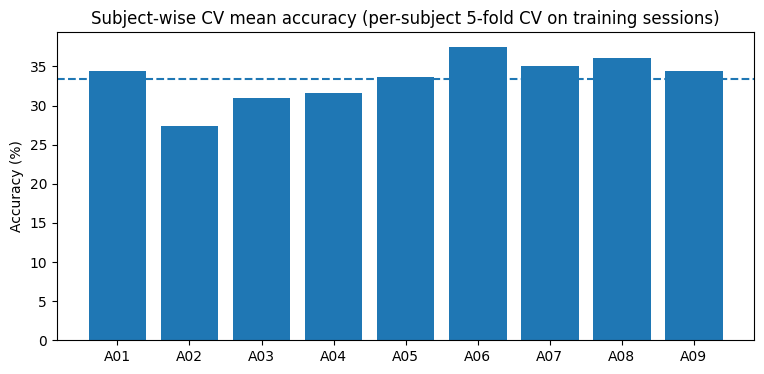


Note: many AxxE.gdf files in your folder do not contain MI cue annotations (769..772).
      That's why we used stratified CV on each subject's training session (AxxT.gdf).
If you have separate ground-truth label files for evaluation sessions, tell me their filenames and I'll show how to combine them.


In [3]:
# ---------- Subject-wise 5-fold CV pipeline (robust loader + EEG-ARNN) ----------
# Paste & run this single cell in your notebook

import os, re, random, math
import numpy as np
from collections import Counter
import mne
import torch, torch.nn as nn
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# ------------------ Config & reproducibility ------------------
DATA_ROOT = "./../BCICIV_2a_gdf"   # ← adjust if needed
SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Device:", device)

N_SPLITS = 5           # stratified CV folds per subject
EPOCHS = 60            # per-fold epochs (reduce if CPU too slow)
BATCH = 32
LR = 1e-3
PATIENCE = 12          # early-stop patience (per fold)
TARGET_SFREQ = 128.0
TMIN, TMAX = 0.0, 4.0
NT = int((TMAX - TMIN) * TARGET_SFREQ)


# ------------------ Robust loader (uses 769..772 if present) ------------------
def load_bci_gdf_robust(path,
                        l_freq=8.0, h_freq=30.0,
                        target_sfreq=TARGET_SFREQ, tmin=TMIN, tmax=TMAX,
                        verbose=True):
    raw = mne.io.read_raw_gdf(path, preload=True, verbose=False)
    # ensure unique channel names
    if len(set(raw.ch_names)) != len(raw.ch_names):
        mapping = {old: f"{old}_{i}" for i, old in enumerate(raw.ch_names)}
        raw.rename_channels(mapping)
        if verbose: print("[loader] made channel names unique")

    # filter/resample
    raw.filter(l_freq, h_freq, verbose=False)
    if abs(raw.info['sfreq'] - target_sfreq) > 1e-3:
        raw.resample(target_sfreq, npad='auto', verbose=False)

    picks = mne.pick_types(raw.info, eeg=True, eog=False, exclude='bads')
    ch_names = [raw.ch_names[i] for i in picks]
    nt = int((tmax - tmin) * target_sfreq)

    # collect annotation descriptions and counts
    ann = raw.annotations
    descs = [str(d) for d in ann.description]
    desc_counts = Counter(descs)
    if verbose:
        print(f"[loader] {os.path.basename(path)} annotation counts sample:", list(desc_counts.items())[:12])

    # prefer canonical MI markers
    preferred = ['769','770','771','772']
    if all(p in desc_counts for p in preferred):
        mi_descs = preferred
        if verbose: print("[loader] found canonical MI cues (769-772).")
    else:
        # try candidates near 72 counts
        exclude_set = set(['32766','768','1023','1072','276','277','783'])
        candidates = [d for d,c in desc_counts.items() if (60 <= c <= 80) and (d not in exclude_set)]
        if len(candidates) >= 4:
            # choose 4 sorted by numeric ID if possible
            try:
                mi_descs = sorted(candidates, key=lambda s: int(re.search(r'\d+', s).group()))[:4]
            except:
                mi_descs = candidates[:4]
            if verbose: print("[loader] selected MI candidates by counts:", mi_descs)
        else:
            # fallback: top-4 frequent non-excluded
            sorted_by_count = sorted(desc_counts.items(), key=lambda x: -x[1])
            filtered = [d for d,c in sorted_by_count if d not in exclude_set]
            if len(filtered) >= 4:
                mi_descs = filtered[:4]
                if verbose: print("[loader] fallback top-4 non-boundary descriptions:", mi_descs)
            else:
                # likely no MI cues present (common for E files)
                if verbose:
                    print("[loader] NO 4 MI-related annotations found in", path)
                    print("         available descriptions (top):", sorted_by_count[:12])
                return np.zeros((0, len(picks), nt), dtype=np.float32), np.zeros((0,), dtype=int), ch_names

    # deterministic mapping
    try:
        mi_descs_sorted = sorted(mi_descs, key=lambda s: int(re.search(r'\d+', s).group()))
    except:
        mi_descs_sorted = sorted(mi_descs)
    desc_to_label = {d: i for i,d in enumerate(mi_descs_sorted)}
    if verbose:
        print("[loader] mapping desc->label:", desc_to_label)
        print("[loader] chosen counts:", {d: desc_counts[d] for d in mi_descs_sorted})

    # extract epochs aligned to MI cue onsets
    Xs, ys = [], []
    sfreq = raw.info['sfreq']
    for d, onset in zip(descs, ann.onset):
        if d in desc_to_label:
            sample = int(round(onset * sfreq))
            start = sample + int(round(tmin * sfreq))
            stop  = sample + int(round(tmax * sfreq))
            if start < 0 or stop > raw.n_times:
                continue
            data = raw.get_data(picks=picks, start=start, stop=stop)
            if data.shape[1] != nt:
                if data.shape[1] > nt:
                    data = data[:, :nt]
                else:
                    pad = np.zeros((len(picks), nt - data.shape[1]), dtype=np.float32)
                    data = np.hstack([data, pad])
            Xs.append(data.astype(np.float32))
            ys.append(desc_to_label[d])
    if len(Xs) == 0:
        return np.zeros((0, len(picks), nt), dtype=np.float32), np.zeros((0,), dtype=int), ch_names
    X = np.stack(Xs, axis=0)
    y = np.array(ys, dtype=int)
    if verbose:
        print(f"[loader] extracted epochs shape: {X.shape}, label distribution: {np.bincount(y)}")
    return X, y, ch_names


# ------------------ EEG_ARNN model (same structure as earlier) ------------------
class TFEMBlock(nn.Module):
    def __init__(self, nch, F=16, k_t=15, pool=False, pool_k=4, drop=0.25):
        super().__init__()
        pad_t = (k_t - 1)//2
        self.conv = nn.Conv2d(1, F, kernel_size=(1,k_t), padding=(0,pad_t))
        self.bn = nn.BatchNorm2d(F)
        self.pw = nn.Conv2d(F, 1, kernel_size=1)
        self.pool = nn.AvgPool2d((1,pool_k)) if pool else None
        self.elu = nn.ELU()
        self.drop = nn.Dropout(drop)
    def forward(self,x):
        b,nch,t = x.shape
        x = x.unsqueeze(1)
        x = self.conv(x); x = self.bn(x); x = self.elu(x); x = self.pw(x)
        if self.pool: x = self.pool(x)
        x = self.drop(x)
        return x.squeeze(1)

class CARM(nn.Module):
    def __init__(self, Wref, tdim, drop=0.25):
        super().__init__()
        self.Wref = Wref
        self.Theta = nn.Parameter(torch.randn(tdim, tdim)*0.01)
        self.elu = nn.ELU(); self.drop = nn.Dropout(drop)
    def forward(self,x):
        h = torch.einsum('ij,bjf->bif', self.Wref, x)
        out = torch.einsum('bif,fg->big', h, self.Theta)
        out = self.elu(out); out = self.drop(out)
        return out

class EEG_ARNN(nn.Module):
    def __init__(self, nch, T0, ncls=4, F=16, pool_k=4, rho=0.001):
        super().__init__()
        self.nch=nch; self.T0=T0; self.ncls=ncls; self.rho=rho
        W0 = torch.ones(nch,nch) - torch.eye(nch)
        Wt = W0 + torch.eye(nch)
        D = Wt.sum(dim=1)
        Dinv = torch.diag(1.0/torch.sqrt(D + 1e-12))
        self.W = nn.Parameter(Dinv @ Wt @ Dinv)
        self.tf1 = TFEMBlock(nch, F=F, k_t=15, pool=False)
        self.c1  = CARM(self.W, tdim=T0)
        self.tf2 = TFEMBlock(nch, F=F, pool=True, pool_k=pool_k)
        T2 = T0 // pool_k
        self.c2  = CARM(self.W, tdim=T2)
        self.tf3 = TFEMBlock(nch, F=F, pool=True, pool_k=pool_k)
        T3 = T2 // pool_k
        self.c3  = CARM(self.W, tdim=T3)
        self.fuse = nn.Conv2d(1,16,kernel_size=(nch,1))
        self.bn = nn.BatchNorm2d(16)
        self.drop = nn.Dropout(0.25)
        self.elu = nn.ELU()
        self.fc = nn.Linear(16*T3, ncls)
    def forward(self,x):
        x = self.tf1(x); x = self.c1(x)
        x = self.tf2(x); x = self.c2(x)
        x = self.tf3(x); x = self.c3(x)
        x = x.unsqueeze(1)
        x = self.fuse(x); x = self.bn(x); x = self.elu(x); x = self.drop(x)
        x = x.squeeze(2)
        b,oc,t = x.shape
        x = x.view(b, oc*t)
        return self.fc(x)


# ------------------ Helpers: normalization, train/eval ------------------
def zscore_epochs(X):
    Xz = X.copy()
    n, ch, t = Xz.shape
    for i in range(n):
        mu = Xz[i].mean(axis=1, keepdims=True)
        sd = Xz[i].std(axis=1, keepdims=True) + 1e-12
        Xz[i] = (Xz[i] - mu) / sd
    return Xz

def train_epoch(model, loader, opt, crit, device):
    model.train(); total=0; n=0
    for xb,yb in loader:
        xb,yb = xb.to(device), yb.to(device)
        opt.zero_grad()
        out = model(xb); loss = crit(out,yb)
        loss.backward(); opt.step()
        # manual update for W (paper-like)
        with torch.no_grad():
            if model.W.grad is not None:
                model.W.data = (1.0 - model.rho) * model.W.data - model.rho * model.W.grad.data
                model.W.grad.zero_()
        total += loss.item() * xb.size(0); n += xb.size(0)
    return total / max(1,n)

@torch.no_grad()
def evaluate(model, loader, device):
    model.eval()
    preds=[]; ys=[]
    for xb,yb in loader:
        xb = xb.to(device)
        out = model(xb)
        preds.append(out.argmax(dim=1).cpu().numpy())
        ys.append(yb.numpy())
    if len(preds)==0:
        return np.array([]), np.array([])
    return np.concatenate(preds), np.concatenate(ys)


# ------------------ Per-subject CV evaluation ------------------
subjects = [f"A0{i}" for i in range(1,10)]
subject_results = {}

for subj in subjects:
    print("\n========================", subj, "========================")
    tpath = os.path.join(DATA_ROOT, subj + "T.gdf")
    epath = os.path.join(DATA_ROOT, subj + "E.gdf")
    # load train (robust)
    Xtr, ytr, chs = load_bci_gdf_robust(tpath, verbose=True)
    if Xtr.size == 0:
        print(f"[{subj}] No train epochs found, skipping subject.")
        continue

    print(f"[{subj}] train epochs shape: {Xtr.shape}, classes: {np.bincount(ytr)}")
    # check if eval file contains MI cues (if yes, we could evaluate directly)
    Xte, yte, _ = load_bci_gdf_robust(epath, verbose=False)
    if Xte.size > 0:
        print(f"[{subj}] NOTE: evaluation file contains MI cues (will evaluate after CV).")
    else:
        print(f"[{subj}] NOTE: evaluation file does NOT contain MI cues (we will use stratified CV on training only).")

    # normalize
    Xtr = zscore_epochs(Xtr)

    # CV splits
    skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=SEED)
    fold_best = []
    for fold, (tr_idx, val_idx) in enumerate(skf.split(Xtr, ytr), 1):
        X_trf, y_trf = Xtr[tr_idx], ytr[tr_idx]
        X_valf, y_valf = Xtr[val_idx], ytr[val_idx]

        tr_loader = DataLoader(TensorDataset(torch.tensor(X_trf), torch.tensor(y_trf)), batch_size=BATCH, shuffle=True, drop_last=False)
        val_loader = DataLoader(TensorDataset(torch.tensor(X_valf), torch.tensor(y_valf)), batch_size=BATCH, shuffle=False)

        model = EEG_ARNN(nch=Xtr.shape[1], T0=Xtr.shape[2], ncls=len(np.unique(ytr))).to(device)
        params = [p for n,p in model.named_parameters() if n!='W' and p.requires_grad]
        opt = torch.optim.AdamW(params, lr=LR, weight_decay=1e-4)
        crit = nn.CrossEntropyLoss()

        best_val_acc = 0.0
        best_epoch = 0
        wait = 0
        for ep in range(1, EPOCHS+1):
            tloss = train_epoch(model, tr_loader, opt, crit, device)
            preds_val, yv = evaluate(model, val_loader, device)
            if preds_val.size>0:
                vacc = accuracy_score(yv, preds_val)
            else:
                vacc = 0.0
            if vacc > best_val_acc:
                best_val_acc = vacc
                best_epoch = ep
                wait = 0
                # you can save fold model here if desired
            else:
                wait += 1
            if ep % 10 == 0 or ep == 1:
                print(f"[{subj}] fold {fold} ep {ep:03d} train_loss={tloss:.4f} val_acc={vacc:.4f}")
            if wait >= PATIENCE:
                print(f"[{subj}] fold {fold} early stopping at ep {ep}, best_val={best_val_acc:.4f} (epoch {best_epoch})")
                break
        fold_best.append(best_val_acc)
        print(f"[{subj}] fold {fold} best_val_acc = {best_val_acc:.4f}")

    mean_acc = float(np.mean(fold_best))
    std_acc  = float(np.std(fold_best))
    subject_results[subj] = {'folds': fold_best, 'mean': mean_acc, 'std': std_acc, 'n_trials': Xtr.shape[0]}

    print(f"[{subj}] CV mean ± std = {mean_acc:.4f} ± {std_acc:.4f}")

# ------------------ Summary print ------------------
print("\n\n====== SUBJECT-WISE SUMMARY ======")
subjects_done = sorted(subject_results.keys())
means = []
for s in subjects_done:
    m = subject_results[s]['mean']; sd = subject_results[s]['std']
    n = subject_results[s]['n_trials']
    means.append(m)
    print(f"{s}: mean acc = {m*100:.2f}%, std = {sd*100:.2f}%, trials={n}")
if len(means)>0:
    print(f"\nOverall mean (subjects) = {np.mean(means)*100:.2f}% ± {np.std(means)*100:.2f}%")

# ------------------ Bar plot (per-subject mean) ------------------
if len(means) > 0:
    plt.figure(figsize=(9,4))
    plt.bar(subjects_done, [subject_results[s]['mean']*100 for s in subjects_done])
    plt.axhline(np.mean([subject_results[s]['mean']*100 for s in subjects_done]), linestyle='--')
    plt.ylabel("Accuracy (%)")
    plt.title("Subject-wise CV mean accuracy (per-subject 5-fold CV on training sessions)")
    plt.show()

# ------------------ Note on evaluation files ------------------
print("\nNote: many AxxE.gdf files in your folder do not contain MI cue annotations (769..772).")
print("      That's why we used stratified CV on each subject's training session (AxxT.gdf).")
print("If you have separate ground-truth label files for evaluation sessions, tell me their filenames and I'll show how to combine them.")
